In [153]:
!pip install pyproj
!pip install geopandas
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Found existing installation: Cython 3.0.5
Uninstalling Cython-3.0.5:
  Successfully uninstalled Cython-3.0.5
  Using cached Cython-3.0.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
Found existing installation: Cartopy 0.22.0
Uninstalling Cartopy-0.22.0:
  Successfully uninstalled Cartopy-0.22.0
  Using cached Cartopy-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)


E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.2
Uninstalling shapely-2.0.2:
  Successfully uninstalled shapely-2.0.2
  Using cached shapely-2.0.2-cp310-cp310-linux_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [154]:
import pandas as pd
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time
from astropy.stats import RipleysKEstimator
import geopandas as gpd
import shapely

from PIL import Image, ImageDraw
import colorsys

In [155]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/datasets/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [156]:
#Se formatean los datos de fecha
from datetime import datetime

df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT


In [157]:
df_coordenadas = df[["latitud",'longitud']]

In [158]:
#La proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [159]:
df_coordenadas['x'], df_coordenadas['y'] = P(df_coordenadas['longitud'], df_coordenadas['latitud'])

<ipython-input-159-9e34bdff0878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coordenadas['x'], df_coordenadas['y'] = P(df_coordenadas['longitud'], df_coordenadas['latitud'])
<ipython-input-159-9e34bdff0878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coordenadas['x'], df_coordenadas['y'] = P(df_coordenadas['longitud'], df_coordenadas['latitud'])


In [160]:
df_coordenadas

,latitud,longitud,x,y
0,7.076011,-73.102501,709584.027559,782579.281866
1,7.079495,-73.105400,709262.121378,782963.354103
2,7.090290,-73.091003,710847.924654,784163.825097
3,7.067435,-73.090958,710863.366771,781635.895608
4,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...
1257,7.072610,-73.099487,709918.546763,782204.438977
1258,7.065252,-73.103607,709466.644754,781388.734012
1259,7.091391,-73.103264,709492.782783,784279.996264
1260,7.061083,-73.097000,710198.574916,780930.648555


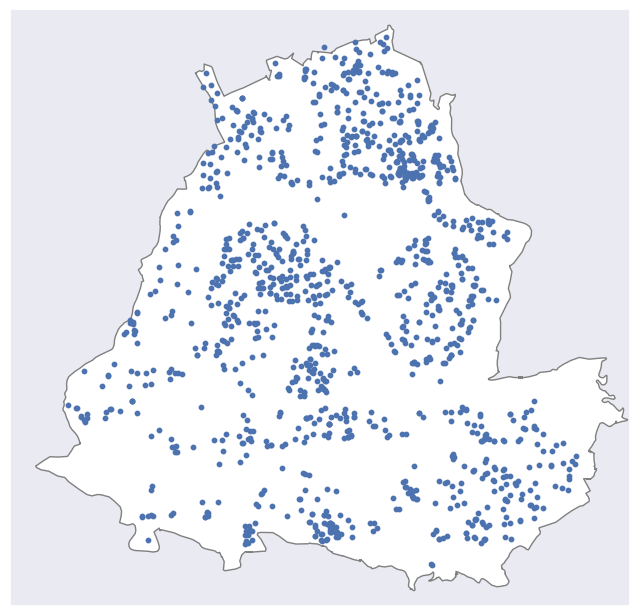

In [161]:
 #Proyección del mapa de floridablanca

url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'
file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]
for file in file_list:
    urllib.request.urlretrieve(url+file, file)

subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')
for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df_coordenadas['longitud'], df_coordenadas['latitud'], zorder=10, c='b', s=10)

plt.show()

In [162]:
def divideDistance(a,b,resolucion):
  return (a-b)/resolucion

In [163]:
def matriz_resolucion (resolucion):
  #Puntos maximos y minimos
  xmax=df_coordenadas['x'].max()
  xmin=df_coordenadas['x'].min()
  ymax=df_coordenadas['y'].max()
  ymin=df_coordenadas['y'].min()

  #obtener filas y columnas
  columnas=math.ceil(divideDistance(xmax,xmin,resolucion))
  filas=math.ceil(divideDistance(ymax,ymin,resolucion))
  print(columnas, filas)

  #Llenar matriz de ceros
  matriz=[]
  matriz = [[0 for _ in range(columnas)] for _ in range(filas)]

  #Recorrer dataframe
  for indice, fila in df_coordenadas.iterrows():
    columna=math.floor(divideDistance(fila['x'],xmin,resolucion))
    fila=math.floor(divideDistance(fila['y'],ymin,resolucion))
    matriz[fila][columna] = matriz[fila][columna]+1
  return matriz


In [164]:
resolucion = 10

In [194]:
matriz=matriz_resolucion(resolucion)
matriz_vis= np.array(matriz)
matriz_vis[1:200, 0:200]

438 455


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [166]:
#Obtener filas y columnas de la matriz
rows=len(matriz)
cols=len(matriz[0])
print(cols, rows)

438 455


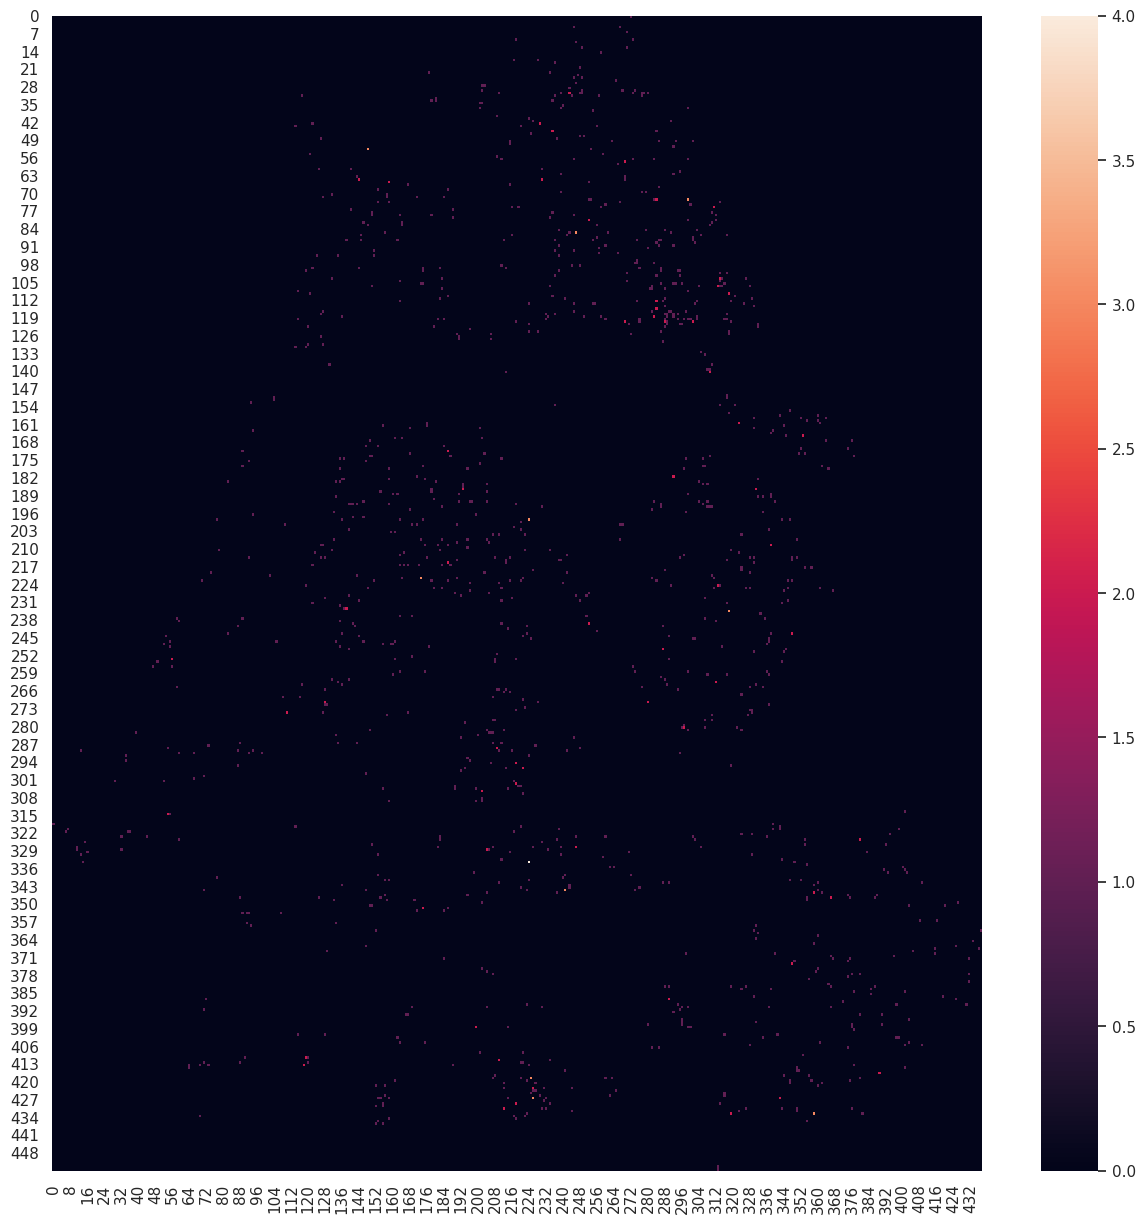

In [167]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,15)})
p = sns.heatmap(np.flipud(matriz))

In [168]:
def distancia(x1,y1,x2,y2):
  return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [195]:
#Crear las funciones de kernel

def uniforme(distancia,radio):
  k=1
  return k

def triangular(distancia,radio):
  k=1-(distancia/radio)
  return k

def gaussiana(distancia,radio):
  k=(math.e)**(-((distancia**2)/(2*(radio**2))))
  return k

def epanechnikov(distancia,radio):
  k=1-((distancia**2)/(radio**2))
  return k

def exponencial(distancia,radio):
  k=(math.e)**(-(distancia/radio))
  return k

def coseno(distancia,radio):
  k=math.cos((math.pi*distancia)/(2*radio))
  return k

def kernel(tipo, distancia, radio):
  if tipo == "uniforme":
    k=uniforme(distancia,radio)
  elif tipo == "triangular":
    k=triangular(distancia,radio)
  elif tipo == "gaussiana":
    k=gaussiana(distancia,radio)
  elif tipo == "epanechnikov":
    k=epanechnikov(distancia,radio)
  elif tipo == "exponencial":
    k=exponencial(distancia,radio)
  elif tipo == "coseno":
    k=coseno(distancia,radio)
  else:
    k=0
  kernel=k/(math.pi*(radio**2))
  return kernel

In [196]:
#las funciones kernel son: uniforme, triangular, gauss, epane, exponencial y coseno
kernel("exponencial",85,100)

1.3605039834185183e-05

In [197]:
def KDE(tipo, resolucion, ancho_banda, cMatrix):
  #Llenar matriz de ceros
  dMatrix=[]
  dMatrix = [[0 for _ in range(cols)] for _ in range(rows)]
  r=math.ceil(ancho_banda/resolucion)

  for i in range (rows):
    y_ini=i-r
    y_fin=i+r
    if (y_ini<0):
      y_ini=0
    if (y_fin>rows):
      y_fin=rows

    for j in range (cols):
      x_ini=j-r
      x_fin=j+r
      if (x_ini<0):
        x_ini=0
      if (x_fin>cols):
        x_fin=cols

      for k in range (y_ini, y_fin):
        for l in range (x_ini, x_fin):
          distancia1=distancia(i,j,k,l)
          if (distancia1<=r):
            dMatrix[i][j]+=(cMatrix[k][l]*kernel(tipo,(distancia1*r),ancho_banda))

  return dMatrix


In [248]:
ancho_banda=100
tipo="exponencial"

matrizDensidad=KDE(tipo,resolucion, ancho_banda, matriz)
matrizDensidad_vis= np.array(matriz)
matrizDensidad_vis[1:200, 0:200]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

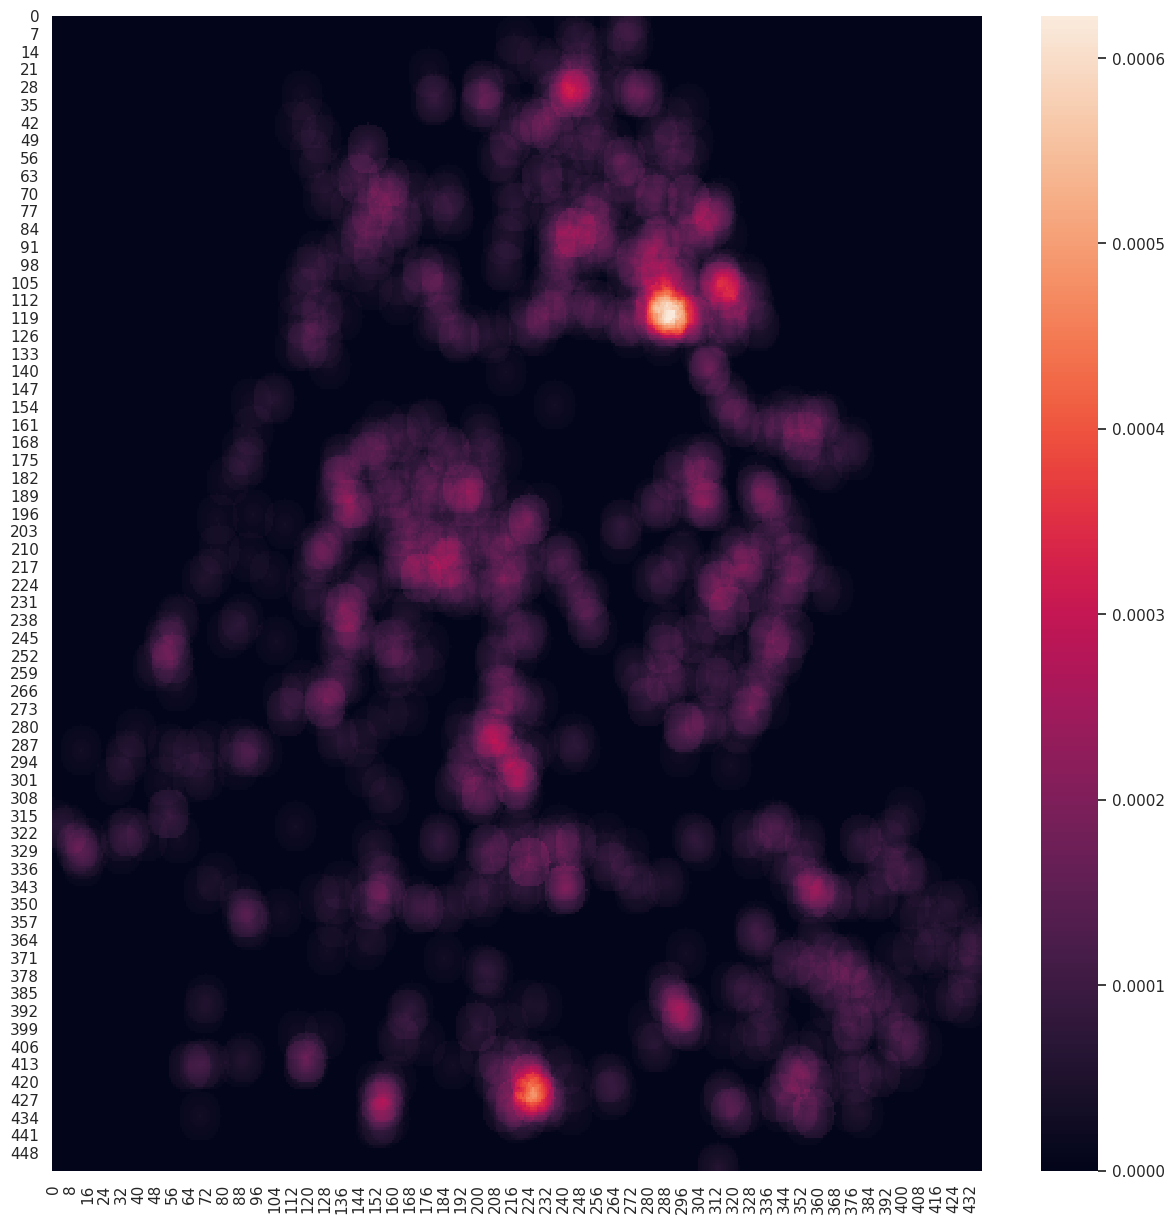

In [249]:
#Mapa Normal al invertir
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,15)})
p = sns.heatmap(np.flipud(matrizDensidad))

In [250]:
import colorsys

def rgb_a_hsv(r, g, b):
  (h, s, v) = colorsys.rgb_to_hsv(r, g, b)
  return (h, s, v)

def hsv_a_rgb(h, s, v):
  (r, g, b) = colorsys.hsv_to_rgb(h, s, v)
  r = int(r)
  g = int(g)
  b = int(b)
  return (r, g, b)

In [251]:
#rgb

def pintar_color(rojo,verde,azul):
  img  = Image.new('RGB', (300, 25))
  draw = ImageDraw.Draw(img)
  draw.rectangle([(0,0), img.size], fill = (rojo,verde,azul))
  display(img)


#Color inicial (red,green,blue)
r_inicial = 0
g_inicial = 255
b_inicial = 0
hsv_inicial = rgb_a_hsv(r_inicial, g_inicial, b_inicial)

#color final (red,green,blue)

r_final = 255
g_final = 0
b_final = 0
hsv_final = rgb_a_hsv(r_final, g_final, b_final)

n_colores = 10

for i in range(n_colores):
  h = (hsv_inicial[0]+i*((hsv_final[0]-hsv_inicial[0]) / (n_colores-1)))
  s = (hsv_inicial[1]+i*((hsv_final[1]-hsv_inicial[1]) / (n_colores-1)))
  v = (hsv_inicial[2]+i*((hsv_final[2]-hsv_inicial[2]) / (n_colores-1)))

  (r,g,b) = hsv_a_rgb(h,s,v)
  pintar_color(r,g,b)

In [252]:
def gama_colores(color_ini, color_fin, n_color):
  t_ini = rgb_a_hsv(color_ini[0], color_ini[1], color_ini[2])
  h_ini = t_ini[0]
  s_ini = t_ini[1]
  v_ini = t_ini[2]

  t_fin = rgb_a_hsv(color_fin[0], color_fin[1], color_fin[2])
  h_fin = t_fin[0]
  s_fin = t_fin[1]
  v_fin = t_fin[2]

  lista_colores = []
  for i in range(n_colores):
    h = h_ini + (i * (h_fin - h_ini) / (n_colores - 1))
    s = s_ini + (i * (s_fin - s_ini) / (n_colores - 1))
    v = v_ini + (i * (v_fin - v_ini) / (n_colores - 1))
    t_rgb = hsv_a_rgb(h, s, v)
    lista_colores.append((t_rgb[0], t_rgb[1], t_rgb[2]))

  return lista_colores

In [253]:
lista_colores = gama_colores((255,255,0), (255,0,0), 10)
print(lista_colores)

[(255, 255, 0), (255, 226, 0), (255, 198, 0), (255, 170, 0), (255, 141, 0), (255, 113, 0), (255, 84, 0), (255, 56, 0), (255, 28, 0), (255, 0, 0)]


In [254]:
#generar la imagen
!pip install Pillow
from IPython.display import display

In [255]:
matriz_sin_ceros_array = np.array(matrizDensidad)
matriz_sin_ceros = matriz_sin_ceros_array[matriz_sin_ceros_array != 0]

min_densidad = matriz_sin_ceros.min()
max_densidad = matriz_sin_ceros.max()

print(min_densidad)
print(max_densidad)


1.1709966304863832e-05
0.0006228240680228437


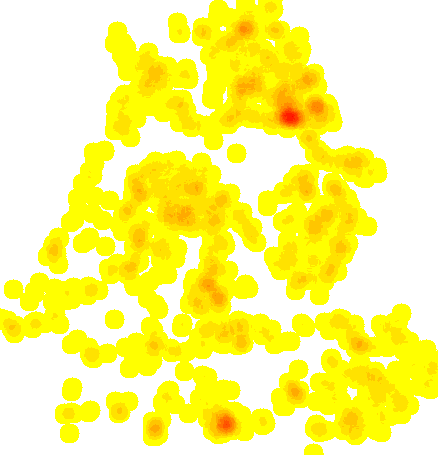

In [256]:
width = (cols)
height = (rows)

image = Image.new("RGB", (width, height))
matriz_densidad_invertida_array= np.array(matrizDensidad)
matriz_densidad_invertida = np.flipud(matriz_densidad_invertida_array)
for y in range(height):
    for x in range(width):
        density_value = matriz_densidad_invertida[y][x]
        if (density_value != 0):
         color_index = int((density_value - min_densidad) / (max_densidad - min_densidad) * (len(lista_colores) - 1))
         color = lista_colores[color_index]
        else:
         color = (255,255,255)
        image.putpixel((x, y), color)


display(image)